In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
us_time_series = pd.read_csv('covid_dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
us_time_series = us_time_series.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_', 'Combined_Key'],axis=1)

In [4]:
us_time_series.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,Alabama,0,0,0,0,0,0,0,0,0,...,15611,15611,15611,15616,15619,15621,15655,15655,15659,15659
1,Alabama,0,0,0,0,0,0,0,0,0,...,55373,55373,55373,55385,55392,55408,55414,55414,55420,55420
2,Alabama,0,0,0,0,0,0,0,0,0,...,5478,5478,5478,5655,5656,5656,5656,5656,5656,5656
3,Alabama,0,0,0,0,0,0,0,0,0,...,6415,6415,6415,6416,6417,6418,6418,6418,6417,6417
4,Alabama,0,0,0,0,0,0,0,0,0,...,14896,14896,14896,14898,14899,14899,14900,14900,14901,14901


In [5]:
us_time_series = us_time_series.drop(us_time_series.columns[[*range(1,50)]],axis=1)
us_time_series.head()

,Province_State,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,...,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22
0,Alabama,0,0,0,0,0,0,0,0,0,...,15611,15611,15611,15616,15619,15621,15655,15655,15659,15659
1,Alabama,0,0,0,0,1,1,1,1,1,...,55373,55373,55373,55385,55392,55408,55414,55414,55420,55420
2,Alabama,0,0,0,0,0,0,0,0,0,...,5478,5478,5478,5655,5656,5656,5656,5656,5656,5656
3,Alabama,0,0,0,0,0,0,0,0,0,...,6415,6415,6415,6416,6417,6418,6418,6418,6417,6417
4,Alabama,0,0,0,0,0,0,0,0,0,...,14896,14896,14896,14898,14899,14899,14900,14900,14901,14901


In [6]:
nc_time_series = us_time_series[us_time_series['Province_State']=='North Carolina']

In [7]:
case_data = nc_time_series.iloc[0,1:]

In [8]:
case_date = list(nc_time_series.columns)[1:]

In [9]:
data = pd.DataFrame(zip(case_date, case_data), columns=['dates', '#cases'])

In [10]:
from datetime import datetime
con=data['dates']
data['dates']=pd.to_datetime(data['dates'])
data.set_index('dates', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20',
               ...
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03'],
              dtype='datetime64[ns]', name='dates', length=754, freq=None)

In [11]:
#convert to time series:
ts = data['#cases']
ts.head(10)

dates
2020-03-11    0
2020-03-12    0
2020-03-13    0
2020-03-14    0
2020-03-15    0
2020-03-16    0
2020-03-17    0
2020-03-18    0
2020-03-19    1
2020-03-20    1
Name: #cases, dtype: int64

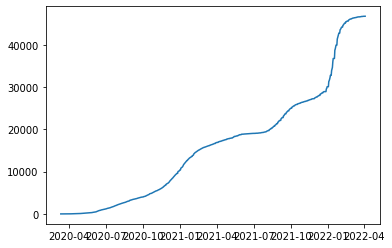

In [12]:
plt.plot(ts)

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

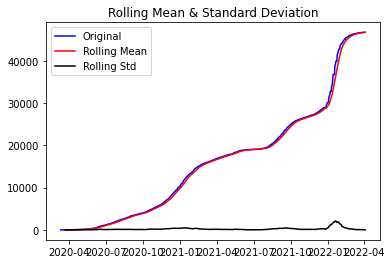

Results of Dickey-Fuller Test:
Test Statistic                   1.839603
p-value                          0.998424
#Lags Used                      20.000000
Number of Observations Used    733.000000
Critical Value (1%)             -3.439303
Critical Value (5%)             -2.865491
Critical Value (10%)            -2.568874
dtype: float64


In [14]:
test_stationarity(ts)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


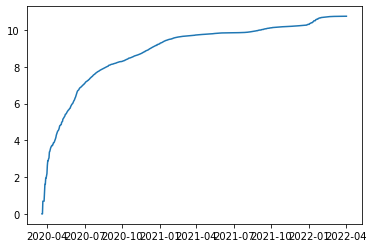

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [16]:
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log.dropna(inplace=True)

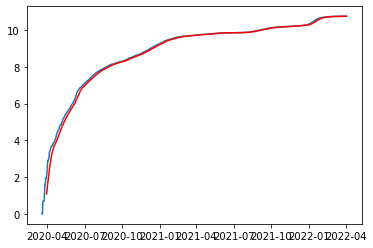

In [17]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='r')

In [18]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

dates
2020-03-19         NaN
2020-03-20         NaN
2020-03-21         NaN
2020-03-22         NaN
2020-03-23         NaN
2020-03-24         NaN
2020-03-25         NaN
2020-03-26         NaN
2020-03-27         NaN
2020-03-28         NaN
2020-03-29         NaN
2020-03-30    0.990997
Name: #cases, dtype: float64

In [19]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

dates
2020-03-30    0.990997
2020-03-31    0.925678
2020-04-01    1.147589
2020-04-02    1.215801
2020-04-03    1.032699
Name: #cases, dtype: float64

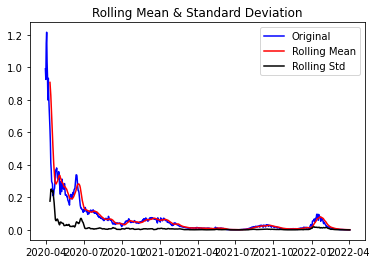

Results of Dickey-Fuller Test:
Test Statistic                  -4.375633
p-value                          0.000328
#Lags Used                      19.000000
Number of Observations Used    715.000000
Critical Value (1%)             -3.439529
Critical Value (5%)             -2.865591
Critical Value (10%)            -2.568927
dtype: float64


In [20]:
test_stationarity(ts_log_moving_avg_diff)

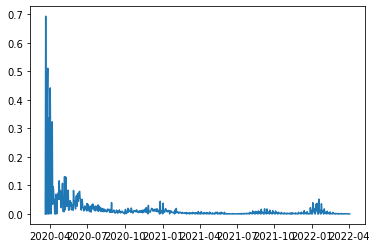

In [21]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [22]:
# ts_log_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [24]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

In [25]:
model = ARIMA(ts_log_diff, order = (1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
results = model.fit()

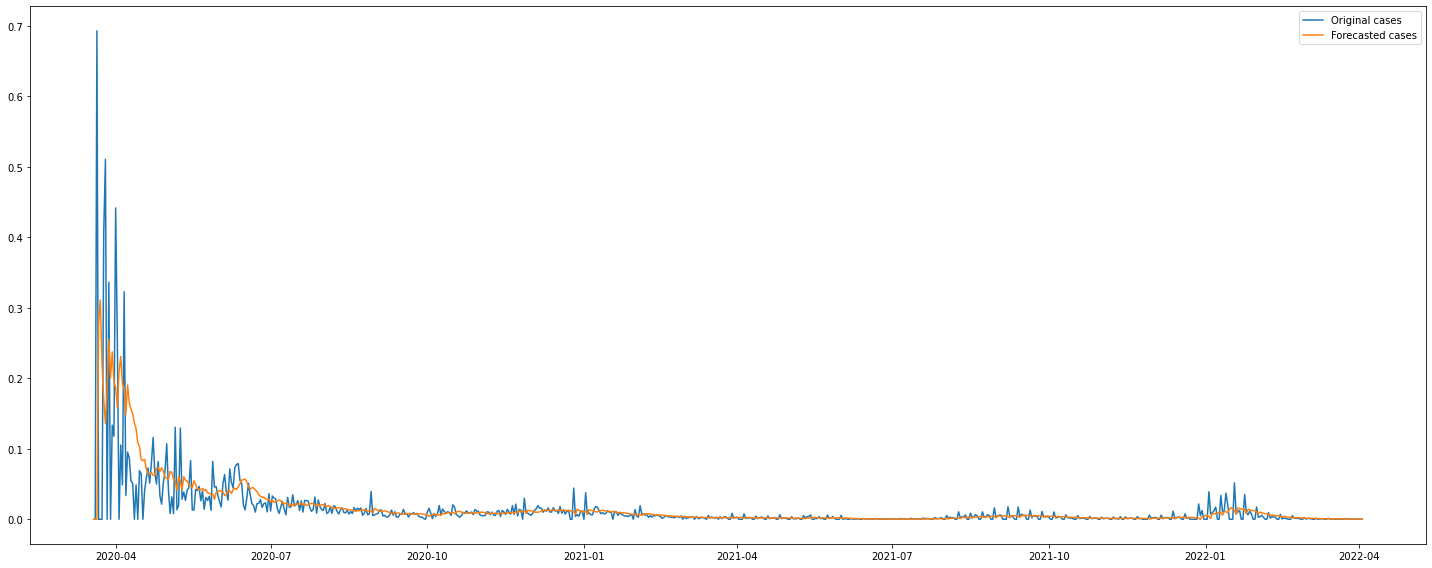

In [37]:
plt.figure(figsize=(20,8))
plt.plot(ts_log_diff, label = 'Original cases')
plt.plot(results.fittedvalues, label = 'Forecasted cases')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/arima.pdf')

In [28]:
sum_result = results.summary()
sum_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 #cases   No. Observations:                  746
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1388.332
Date:                Sun, 10 Apr 2022   AIC                          -2770.664
Time:                        23:11:47   BIC                          -2756.824
Sample:                    03-19-2020   HQIC                         -2765.330
                         - 04-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2008      0.007    -30.390      0.000      -0.214      -0.188
ma.L1         -0.8659      0.010    -88.033      0.000      -0.885      -0.847
sigma2         0.0014   1.66e-05     82.415      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):            125984.40
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

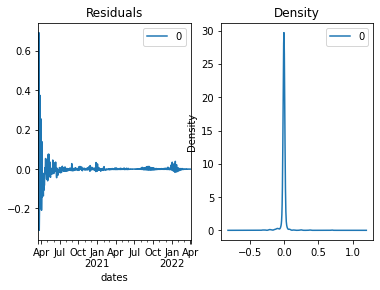

In [29]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [30]:
results.pvalues[0]

7.509335596696803e-203

In [31]:
results.standardized_forecasts_error.mean()

-0.062306867856472124